<a href="https://colab.research.google.com/github/abiflynn/BeautyBOT/blob/main/data_cleaning_analysis/skincare_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 1000)
#pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
skincare = pd.read_csv("/content/drive/MyDrive/Final Project/4. Data Sets /skincare_products_clean.csv")

In [ ]:
skincare.head(2)

product_name                                                                                    product_url product_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     clean_ingreds   price
0  The Ordinary Natural Moisturising Factors + HA 30ml  https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser  ['capric triglyceride', 'cetyl alcohol', 'propanediol', 'stearyl alcohol', 'glycerin', 'sodium hyaluronate', 'arganine', 'aspartic acid', 'glycine', 'alanine', 'serine', 'valine', 'isoleucine', 'proline', 'threonine', 'histidine', 'phenylalanine', 'glucose', 'maltose', 'fructose', 'trehalose', 'sodium pca', 'pca', 'sodium lactate', 'urea', 'allantoin', 'linoleic acid', 'oleic acid', 'phytosteryl canola glycerides', 'palmitic acid', 'stearic acid', 'lecithin', 'triolein', 'tocopherol', 'carbomer', 'isoceteth-20', 'polysorbate 60', 'sodium chloride', 'citric acid', 'trisodium ethylenediamine disuccinate', 'pentylene glycol', 'triethanolamine', 'sodium hydroxide', 'phenoxyethanol', 'chlorphenesin']   £5.20
1        CeraVe Facial Moisturising Lotion SPF 25 52ml      https://www.lookfantastic.com/cerave-facial-moisturising-lotion-spf-25-52ml/11798689.html  Moisturiser                                                                                                                                                ['homosalate', 'glycerin', 'octocrylene', 'ethylhexyl', 'salicylate', 'niacinamide', 'silica', 'butyl methoxydibenzoylmethane', 'dimethicon', 'cetearyl alcohol', 'peg-100 stearate', 'glyceryl stearate', 'phenoxyethanol', 'stearic acid', 'behentrimonium methosulfate', 'caprylyl glycol', 'palmitic acid', 'ammonium polyacryloyldmethyl taurate', 'xanthan gum', 'disodium edta', 'tocopherol', 'sodium lauroyl', 'myristic acid', 'sodium hyaluronate', 'ceramide np', 'ceramide ap', 'phytosphingosine', 'cholesterol', 'cerbomer', 'ethylhexyl glycerin', 'ceramide eop']  £13.00

# Exploring the Dataset 

In [ ]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   1138 non-null   object
 1   product_url    1138 non-null   object
 2   product_type   1138 non-null   object
 3   clean_ingreds  1138 non-null   object
 4   price          1138 non-null   object
dtypes: object(5)
memory usage: 44.6+ KB


In [ ]:
skincare.head()

product_name                                                                                                   product_url product_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     clean_ingreds   price
0                  The Ordinary Natural Moisturising Factors + HA 30ml                 https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser  ['capric triglyceride', 'cetyl alcohol', 'propanediol', 'stearyl alcohol', 'glycerin', 'sodium hyaluronate', 'arganine', 'aspartic acid', 'glycine', 'alanine', 'serine', 'valine', 'isoleucine', 'proline', 'threonine', 'histidine', 'phenylalanine', 'glucose', 'maltose', 'fructose', 'trehalose', 'sodium pca', 'pca', 'sodium lactate', 'urea', 'allantoin', 'linoleic acid', 'oleic acid', 'phytosteryl canola glycerides', 'palmitic acid', 'stearic acid', 'lecithin', 'triolein', 'tocopherol', 'carbomer', 'isoceteth-20', 'polysorbate 60', 'sodium chloride', 'citric acid', 'trisodium ethylenediamine disuccinate', 'pentylene glycol', 'triethanolamine', 'sodium hydroxide', 'phenoxyethanol', 'chlorphenesin']   £5.20
1                        CeraVe Facial Moisturising Lotion SPF 25 52ml                     https://www.lookfantastic.com/cerave-facial-moisturising-lotion-spf-25-52ml/11798689.html  Moisturiser                                                                                                                                                ['homosalate', 'glycerin', 'octocrylene', 'ethylhexyl', 'salicylate', 'niacinamide', 'silica', 'butyl methoxydibenzoylmethane', 'dimethicon', 'cetearyl alcohol', 'peg-100 stearate', 'glyceryl stearate', 'phenoxyethanol', 'stearic acid', 'behentrimonium methosulfate', 'caprylyl glycol', 'palmitic acid', 'ammonium polyacryloyldmethyl taurate', 'xanthan gum', 'disodium edta', 'tocopherol', 'sodium lauroyl', 'myristic acid', 'sodium hyaluronate', 'ceramide np', 'ceramide ap', 'phytosphingosine', 'cholesterol', 'cerbomer', 'ethylhexyl glycerin', 'ceramide eop']  £13.00
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration Support Formula 30ml  https://www.lookfantastic.com/the-ordinary-hyaluronic-acid-2-b5-hydration-support-formula-30ml/11363395.html  Moisturiser                                                                                                                                                                                                                                                                                                                                                 ['sodium hyaluronate', 'sodium hyaluronate', 'panthenol', 'ahnfeltia concinna extract', 'glycerin', 'pentylene glycol', 'propanediol', 'polyacrylate crosspolymer-6', 'ppg-26 buteth-26', 'castor oil', 'trisodium ethylenediamine disuccinate', 'citric acid', 'ethoxydiglycol', 'caprylyl glycol', 'hexylene glycol', 'ethylhexyl glycerin', 'phenoxyethanol', 'chlorphenesin']   £6.20
3                            AMELIORATE Transforming Body Lotion 200ml                         https://www.lookfantastic.com/ameliorate-transforming-body-lotion-200ml/11865352.html  Moisturiser                 ['ammonium lactate', 'c12-15', 'glycerin', 'prunus amygdalus dulcis', 'ethylhexyl palmitate', 'cetearyl alcohol', 'glyceryl stearate', 'peg-100 stearate', 'dimethicon', 'hydroxyethyl cellulose', 'phenoxyethanol', 'ce

In [ ]:
skincare.shape

(1138, 5)

In [ ]:
skincare["product_type"].unique()

array(['Moisturiser', 'Serum', 'Oil', 'Mist', 'Balm', 'Mask', 'Peel',
       'Eye Care', 'Cleanser', 'Toner', 'Exfoliator', 'Bath Salts',
       'Body Wash', 'Bath Oil'], dtype=object)

In [ ]:
skincare.drop_duplicates(inplace=True)

In [ ]:
skincare["product_name"].nunique()

1138

# Ingredients

In [ ]:
#replace "and " with a comma
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("[", "", regex=False)
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("]", "", regex=False)
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("'", "", regex=False)
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("'", "", regex=False)
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("\\", "", regex=False)
skincare["clean_ingreds"] = skincare.clean_ingreds.str.replace("wateraquaeau", "water", regex=False)



In [ ]:
skincare.head(2)

product_name                                                                                    product_url product_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         clean_ingreds   price
0  The Ordinary Natural Moisturising Factors + HA 30ml  https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser  capric triglyceride, cetyl alcohol, propanediol, stearyl alcohol, glycerin, sodium hyaluronate, arganine, aspartic acid, glycine, alanine, serine, valine, isoleucine, proline, threonine, histidine, phenylalanine, glucose, maltose, fructose, trehalose, sodium pca, pca, sodium lactate, urea, allantoin, linoleic acid, oleic acid, phytosteryl canola glycerides, palmitic acid, stearic acid, lecithin, triolein, tocopherol, carbomer, isoceteth-20, polysorbate 60, sodium chloride, citric acid, trisodium ethylenediamine disuccinate, pentylene glycol, triethanolamine, sodium hydroxide, phenoxyethanol, chlorphenesin   £5.20
1        CeraVe Facial Moisturising Lotion SPF 25 52ml      https://www.lookfantastic.com/cerave-facial-moisturising-lotion-spf-25-52ml/11798689.html  Moisturiser                                                                                                                    homosalate, glycerin, octocrylene, ethylhexyl, salicylate, niacinamide, silica, butyl methoxydibenzoylmethane, dimethicon, cetearyl alcohol, peg-100 stearate, glyceryl stearate, phenoxyethanol, stearic acid, behentrimonium methosulfate, caprylyl glycol, palmitic acid, ammonium polyacryloyldmethyl taurate, xanthan gum, disodium edta, tocopherol, sodium lauroyl, myristic acid, sodium hyaluronate, ceramide np, ceramide ap, phytosphingosine, cholesterol, cerbomer, ethylhexyl glycerin, ceramide eop  £13.00

In [ ]:
#count how many ingredients each column has 
counts = skincare['clean_ingreds'].str.split(',').str.len()
counts_1 = pd.DataFrame(counts)
counts_1.sort_values("clean_ingreds", ascending=False).head(2)


clean_ingreds
925             90
191             87

In [ ]:
for i in range(1, 91):
    col_name = f"ingredient_{i}"
    skincare[col_name] = skincare["clean_ingreds"].str.split(",").str[i-1]


In [ ]:
skincare["ingredient_90"].unique()

array([nan, ' tocopheryl phosphate'], dtype=object)

In [ ]:
#drop the columns that aren't needed
skincare.drop(["clean_ingreds"], axis=1, inplace = True)

In [ ]:
skincare.head(1)

product_name                                                                                    product_url product_type  price         ingredient_1    ingredient_2  ingredient_3      ingredient_4 ingredient_5         ingredient_6 ingredient_7    ingredient_8 ingredient_9 ingredient_10 ingredient_11 ingredient_12 ingredient_13 ingredient_14 ingredient_15 ingredient_16   ingredient_17 ingredient_18 ingredient_19 ingredient_20 ingredient_21 ingredient_22 ingredient_23    ingredient_24 ingredient_25 ingredient_26   ingredient_27 ingredient_28                   ingredient_29   ingredient_30  ingredient_31 ingredient_32 ingredient_33 ingredient_34 ingredient_35  ingredient_36    ingredient_37     ingredient_38 ingredient_39                           ingredient_40      ingredient_41     ingredient_42      ingredient_43    ingredient_44   ingredient_45 ingredient_46 ingredient_47 ingredient_48 ingredient_49 ingredient_50 ingredient_51 ingredient_52  \
0  The Ordinary Natural Moisturising Factors + HA 30ml  https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser  £5.20  capric triglyceride   cetyl alcohol   propanediol   stearyl alcohol     glycerin   sodium hyaluronate     arganine   aspartic acid      glycine       alanine        serine        valine    isoleucine       proline     threonine     histidine   phenylalanine       glucose       maltose      fructose     trehalose    sodium pca           pca   sodium lactate          urea     allantoin   linoleic acid    oleic acid   phytosteryl canola glycerides   palmitic acid   stearic acid      lecithin      triolein    tocopherol      carbomer   isoceteth-20   polysorbate 60   sodium chloride   citric acid   trisodium ethylenediamine disuccinate   pentylene glycol   triethanolamine   sodium hydroxide   phenoxyethanol   chlorphenesin           NaN           NaN           NaN           NaN           NaN           NaN           NaN   

  ingredient_53 ingredient_54 ingredient_55 ingredient_56 ingredient_57 ingredient_58 ingredient_59 ingredient_60 ingredient_61 ingredient_62 ingredient_63 ingredient_64 ingredient_65 ingredient_66 ingredient_67 ingredient_68 ingredient_69 ingredient_70 ingredient_71 ingredient_72 ingredient_73 ingredient_74 ingredient_75 ingredient_76 ingredient_77 ingredient_78 ingredient_79 ingredient_80 ingredient_81 ingredient_82 ingredient_83 ingredient_84 ingredient_85 ingredient_86 ingredient_87 ingredient_88 ingredient_89 ingredient_90  
0           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN

In [ ]:
for i in range(1, 91):
    col_name = f"ingredient_{i}"
    skincare[col_name] = skincare[col_name].str.strip()


In [ ]:
skincare.tail(2)

product_name                                                                                          product_url product_type   price             ingredient_1               ingredient_2          ingredient_3 ingredient_4                   ingredient_5                   ingredient_6                              ingredient_7     ingredient_8                 ingredient_9 ingredient_10 ingredient_11                  ingredient_12 ingredient_13 ingredient_14 ingredient_15 ingredient_16 ingredient_17 ingredient_18 ingredient_19 ingredient_20 ingredient_21 ingredient_22 ingredient_23 ingredient_24 ingredient_25 ingredient_26 ingredient_27 ingredient_28 ingredient_29 ingredient_30 ingredient_31 ingredient_32 ingredient_33 ingredient_34 ingredient_35 ingredient_36 ingredient_37 ingredient_38 ingredient_39 ingredient_40 ingredient_41 ingredient_42 ingredient_43 ingredient_44 ingredient_45 ingredient_46 ingredient_47 ingredient_48  \
1136  Connock London Kukui Oil Soothing Bath & Shower Oil 200ml  https://www.lookfantastic.com/connock-london-kukui-oil-soothing-bath-shower-oil-200ml/11324517.html     Bath Oil  £36.00      capric triglyceride  peg-40 sorbitan peroleate  ppg-15 stearyl ether       parfum  aleurites moluccanus seed oil  macadamia ternifolia seed oil  calophyllum tacamahaca (tamanu) seed oil  benzyl benzoate  butylphenyl methylpropional      linalool    tocopherol  hydroxyisohexyl 3-cyclohexene   citronellol      limonene      coumarin       eugenol           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
1137                   Weleda Baby Calendula Cream Bath (200ml)                   https://www.lookfantastic.com/weleda-baby-calendula-cream-bath-200ml/10810409.html     Bath Oil  £13.95  prunus amygdalus dulcis  sesamium indicum seed oil               alcohol     glycerin                glyceryl oleate  calendula officinalis extract                          sodium cera alba      xanthan gum                       parfum      limonene      linalool                            NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   

     ingredient_49 ingredient_50 ingredient_51 ingredient_52 ingredient_53 ingredient_54 ingredient_55 ingredient_56 ingredient_57 ingredient_58 ingredient_59 ingredient_60 ingredient_61 ingredient_62 ingredient_63 ingredient_64 ingredient_65 ingredient_66 ingredient_67 ingredient_68 ingredient_69 ingredient_70 ingredient_71 ingredient_72 ingredient_73 ingredient_74 ingredient_75 ingredient_76 ingredient_77 ingredient_78 ingredient_79 ingredient_80 ingredient_81 ingredient_82 ingredient_83 ingredient_84 ingredient_85 ingredient_86 ingredient_87 ingredient_88 ingredient_89 ingredient_90  
1136           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN        

# Encoding

### Upgrade Scikit-Learn

In [ ]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Encode

In [ ]:
 #create a data frame for only columns want to encode
skincare_encode_ingreds = skincare.copy()

skincare_encode_ingreds.drop(["product_name", "product_url", "product_type", "price"], axis=1, inplace = True)

# Combine the base note columns into a single column
skincare_encode_ingreds['ingreds'] = skincare_encode_ingreds.apply(lambda row: ', '.join(filter(lambda x: x is not None, row.astype(str))), axis=1)

# One-hot encode the combined notes
encoded_ingreds = skincare_encode_ingreds['ingreds'].str.get_dummies(', ')

# Merge the encoded notes back into the original DataFrame
skincare_encode_ingreds = pd.concat([skincare_encode_ingreds, encoded_ingreds], axis=1)

# Drop the original note columns and the combined column
ingreds_cols = [f'ingredient_{i}' for i in range(1, 91)] # specify column names to drop
skincare_encode_ingreds = skincare_encode_ingreds.drop(ingreds_cols + ['ingreds', 'nan', '1'], axis=1)

#convert to a dataframe 
skincare_encode_df = pd.DataFrame(skincare_encode_ingreds)

skincare_encode_df.head(5)


"cire dabeille)"  1-methylhydantoin-2-imide  10-decanediol  10-hydroxydecanoic acid  2  2-bromo-2-nitropropane-1  2-butanediol)-4 peg/ppg-29/9 methylglucose  2-dimethylhydrocinnamal  2-hexanediol  2-oleamido-1  3-diol  3-o-ethyl ascorbic acid  3-octadecanediol  4-dicarboxylate  4-t-butylcyclohexanol  6-dimethyl-7-octen-2-ol  6-naphthalate  7-dehydrocholesterol  abies alba leaf oil  abies balsamea extract  abies sibirica oil  acacia concinna fruit extract  acacia decurrens wax  acacia senegal gum  acacia seyal gum extract  acer saccharum extract  acetate  acetone  acetum  acetyl carnitine  acetyl dipeptide-1 cetyl  acetyl farnesylcysteine  acetyl glucosamine  acetyl glutamine  acetyl heptapeptide-4  acetyl hexapeptide-1  acetyl hexapeptide-37  acetyl hexapeptide-49  acetyl hexapeptide-8  acetyl hydroxyproline  acetyl octapeptide-3  acetyl pentapeptide  acetyl tetrapeptide-15  acetyl tetrapeptide-2  acetyl tetrapeptide-3  acetyl tetrapeptide-40  acetyl tetrapeptide-5  \
0                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
1                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
2                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
3                 0                          0             

In [ ]:
skincare_encode_df.columns.str.strip()

Index(['"cire dabeille)"', '1-methylhydantoin-2-imide', '10-decanediol', '10-hydroxydecanoic acid', '2', '2-bromo-2-nitropropane-1', '2-butanediol)-4 peg/ppg-29/9 methylglucose', '2-dimethylhydrocinnamal', '2-hexanediol', '2-oleamido-1',
       ...
       'zinc glycine', 'zinc laurate', 'zinc oxide', 'zinc pca', 'zinc sulfate', 'zingiber aromaticus extract', 'zingiber cassumunar root oil', 'zingiber officinale root extract', 'zingiber officinale root oil', 'zizyphus jujuba seed extract'], dtype='object', length=2412)

In [ ]:
skincare_encode_df.head(2)

"cire dabeille)"  1-methylhydantoin-2-imide  10-decanediol  10-hydroxydecanoic acid  2  2-bromo-2-nitropropane-1  2-butanediol)-4 peg/ppg-29/9 methylglucose  2-dimethylhydrocinnamal  2-hexanediol  2-oleamido-1  3-diol  3-o-ethyl ascorbic acid  3-octadecanediol  4-dicarboxylate  4-t-butylcyclohexanol  6-dimethyl-7-octen-2-ol  6-naphthalate  7-dehydrocholesterol  abies alba leaf oil  abies balsamea extract  abies sibirica oil  acacia concinna fruit extract  acacia decurrens wax  acacia senegal gum  acacia seyal gum extract  acer saccharum extract  acetate  acetone  acetum  acetyl carnitine  acetyl dipeptide-1 cetyl  acetyl farnesylcysteine  acetyl glucosamine  acetyl glutamine  acetyl heptapeptide-4  acetyl hexapeptide-1  acetyl hexapeptide-37  acetyl hexapeptide-49  acetyl hexapeptide-8  acetyl hydroxyproline  acetyl octapeptide-3  acetyl pentapeptide  acetyl tetrapeptide-15  acetyl tetrapeptide-2  acetyl tetrapeptide-3  acetyl tetrapeptide-40  acetyl tetrapeptide-5  \
0                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
1                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   

   acetyl tetrapeptide-9  acetyl tributyl citrate  acetyl trifluoromethylphenyl valylglycine  acetyl tripeptide-30  acetyl tyrosine  acetylarginyltryptophyl diphenylglycine  acetylated glycol stearate  achillea millefolium extract  acorus calamus (sweet flag) root extract  acrylamide/sodium  acrylate crosspolymer  acrylate/acrylic acid copolymer  acrylates /c10-30 alkyl acrylate crosspolymer  acrylates copolymer  acrylates crosspolymer-4  acrylates/ c10-30 alkyl acrylate crosspolymer  acrylates/ palmeth-25 acrylate copolymer  acrylates/ammonium methacrylate copolymer  acrylates/beheneth-25 methacrylate copolymer  acrylates/c1-3 alkyl acrylate crosspolymer  acrylates/c10-30 alkyl  acrylates/c12-22 alkyl methacrylate copolymer  acrylates/octylacrylamide copolymer  acrylates/polytrimethylsiloxymethacrylate copolymer  acrylates/steareth-20 methacrylate crosspolymer  acrylates/vinyl isodecanoate crosspolymer  acrylic acid/vp crosspolymer  acryloyldimethyl taurate copolymer  \
0                      0                        0         

In [ ]:
count = (skincare_encode_df["water"] == 1).sum()
count

7

# Clusters

In [ ]:
from sklearn.cluster import KMeans

skincare_kmeans = KMeans(n_clusters=5).fit(skincare_encode_df) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
skincare_kmeans.cluster_centers_

array([[-6.50521303e-19, -6.50521303e-19, -6.50521303e-19, ...,
         0.00000000e+00, -6.93889390e-18, -3.25260652e-19],
       [ 2.94117647e-03,  5.88235294e-03,  7.37257477e-18, ...,
         5.88235294e-03,  3.03576608e-17,  3.68628739e-18],
       [ 3.25260652e-18,  3.25260652e-18,  3.25260652e-18, ...,
         9.66183575e-03,  9.66183575e-03,  1.62630326e-18],
       [ 4.29184549e-03,  3.90312782e-18,  3.90312782e-18, ...,
         4.29184549e-03,  1.71673820e-02,  4.29184549e-03],
       [ 5.42101086e-18,  5.42101086e-18,  7.16845878e-03, ...,
         1.43369176e-02,  3.58422939e-03,  2.71050543e-18]])

In [ ]:
skincare_encode_df['cluster'] = skincare_kmeans.labels_
skincare_encode_df.sample(2)

"cire dabeille)"  1-methylhydantoin-2-imide  10-decanediol  10-hydroxydecanoic acid  2  2-bromo-2-nitropropane-1  2-butanediol)-4 peg/ppg-29/9 methylglucose  2-dimethylhydrocinnamal  2-hexanediol  2-oleamido-1  3-diol  3-o-ethyl ascorbic acid  3-octadecanediol  4-dicarboxylate  4-t-butylcyclohexanol  6-dimethyl-7-octen-2-ol  6-naphthalate  7-dehydrocholesterol  abies alba leaf oil  abies balsamea extract  abies sibirica oil  acacia concinna fruit extract  acacia decurrens wax  acacia senegal gum  acacia seyal gum extract  acer saccharum extract  acetate  acetone  acetum  acetyl carnitine  acetyl dipeptide-1 cetyl  acetyl farnesylcysteine  acetyl glucosamine  acetyl glutamine  acetyl heptapeptide-4  acetyl hexapeptide-1  acetyl hexapeptide-37  acetyl hexapeptide-49  acetyl hexapeptide-8  acetyl hydroxyproline  acetyl octapeptide-3  acetyl pentapeptide  acetyl tetrapeptide-15  acetyl tetrapeptide-2  acetyl tetrapeptide-3  acetyl tetrapeptide-40  acetyl tetrapeptide-5  \
740                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
26                  0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   

     acetyl tetrapeptide-9  acetyl tributyl citrate  acetyl trifluoromethylphenyl valylglycine  acetyl tripeptide-30  acetyl tyrosine  acetylarginyltryptophyl diphenylglycine  acetylated glycol stearate  achillea millefolium extract  acorus calamus (sweet flag) root extract  acrylamide/sodium  acrylate crosspolymer  acrylate/acrylic acid copolymer  acrylates /c10-30 alkyl acrylate crosspolymer  acrylates copolymer  acrylates crosspolymer-4  acrylates/ c10-30 alkyl acrylate crosspolymer  acrylates/ palmeth-25 acrylate copolymer  acrylates/ammonium methacrylate copolymer  acrylates/beheneth-25 methacrylate copolymer  acrylates/c1-3 alkyl acrylate crosspolymer  acrylates/c10-30 alkyl  acrylates/c12-22 alkyl methacrylate copolymer  acrylates/octylacrylamide copolymer  acrylates/polytrimethylsiloxymethacrylate copolymer  acrylates/steareth-20 methacrylate crosspolymer  acrylates/vinyl isodecanoate crosspolymer  acrylic acid/vp crosspolymer  acryloyldimethyl taurate copolymer  \
740                      0                        0 

In [ ]:
skincare_clusters = pd.merge(skincare, skincare_encode_df, left_index=True, right_index=True)
skincare_clusters.head()

product_name                                                                                                   product_url product_type   price         ingredient_1        ingredient_2         ingredient_3                 ingredient_4          ingredient_5        ingredient_6       ingredient_7                   ingredient_8      ingredient_9           ingredient_10                          ingredient_11       ingredient_12   ingredient_13        ingredient_14                ingredient_15        ingredient_16   ingredient_17                         ingredient_18     ingredient_19                ingredient_20     ingredient_21   ingredient_22  ingredient_23       ingredient_24 ingredient_25 ingredient_26     ingredient_27 ingredient_28                  ingredient_29            ingredient_30 ingredient_31 ingredient_32           ingredient_33           ingredient_34 ingredient_35                   ingredient_36   ingredient_37  \
0                  The Ordinary Natural Moisturising Factors + HA 30ml                 https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser   £5.20  capric triglyceride       cetyl alcohol          propanediol              stearyl alcohol              glycerin  sodium hyaluronate           arganine                  aspartic acid           glycine                 alanine                                 serine              valine      isoleucine              proline                    threonine            histidine   phenylalanine                               glucose           maltose                     fructose         trehalose      sodium pca            pca      sodium lactate          urea     allantoin     linoleic acid    oleic acid  phytosteryl canola glycerides            palmitic acid  stearic acid      lecithin                triolein              tocopherol      carbomer                    isoceteth-20  polysorbate 60   
1                        CeraVe Facial Moisturising Lotion SPF 25 52ml                     https://www.lookfantastic.com/cerave-facial-moisturising-lotion-spf-25-52ml/11798689.html  Moisturiser  £13.00           homosalate            glycerin          octocrylene                   ethylhexyl            salicylate         niacinamide             silica  butyl methoxydibenzoylmethane        dimethicon        cetearyl alcohol                       peg-100 stearate   glyceryl stearate  phenoxyethanol         stearic acid  behentrimonium methosulfate      caprylyl glycol   palmitic acid  ammonium polyacryloyldmethyl taurate       xanthan gum                disodium edta        tocopherol  sodium lauroyl  myristic acid  sodium hyaluronate   ceramide np   ceramide ap  phytosphingosine   cholesterol                       cerbomer      ethylhexyl glycerin  ceramide eop           NaN                     NaN                     NaN           NaN                             NaN             NaN   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration Support Formula 30ml  https://www.lookfantastic.com/the-ordinary-hyaluronic-acid-2-b5-hydration-support-formula-30ml/11363395.html  Moisturiser   £6.20   sodium hyaluronate  sodium hyaluronate            panthenol   ahnfeltia concinna extract              glycerin    pentylene glycol        propanediol    polyacrylate crosspolymer-6  ppg-26 buteth-26              castor oil  trisodium ethylenediamine disuccinate         citric acid  ethoxydiglycol      caprylyl glycol              hexylene glycol  ethylhexyl glycerin  phenoxyethanol                         chlorphenesin               NaN                          NaN               NaN             NaN            NaN                 NaN           NaN           NaN               NaN           NaN                            NaN                      NaN           NaN           NaN                     NaN                     NaN           NaN                             NaN             NaN   
3                            AMELIORATE Transforming Body 

In [ ]:
#count of clusters
skincare_clusters_count = skincare_clusters["cluster"].value_counts()

#creating a df
skincare_clusters_count_df = pd.DataFrame(skincare_clusters_count)
skincare_clusters_count_df.sort_index()

cluster
0       79
1      340
2      207
3      233
4      279

# Inertia

In [ ]:
#import 
from sklearn.cluster import KMeans

#calculate inertia
skincare_kmeans.inertia_

22195.68040586722

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

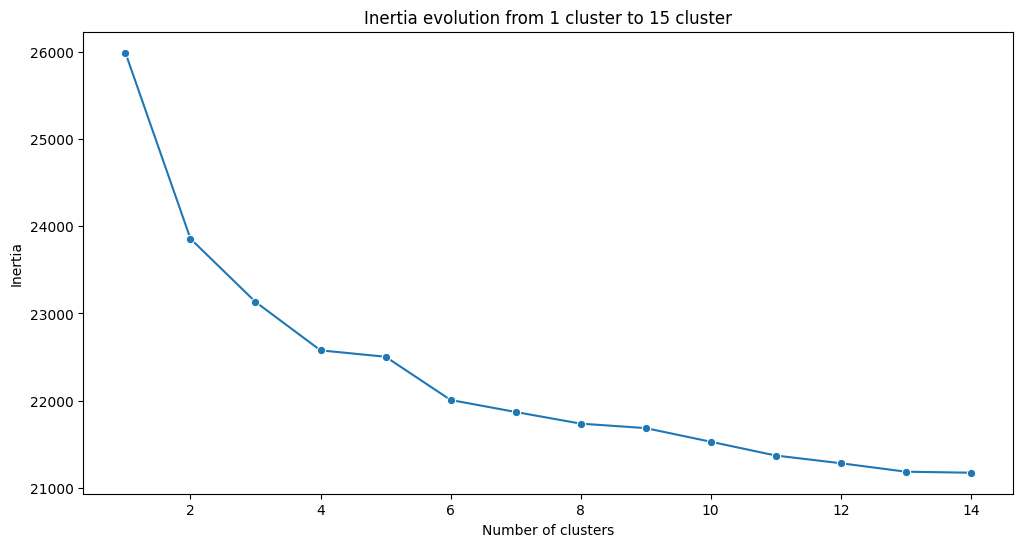

In [ ]:
#plot inertia
import matplotlib.pyplot as plt
import seaborn as sns

max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(skincare_encode_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

In [ ]:
#import and calculate sihouette score 
from sklearn.metrics import silhouette_score
silhouette_score(skincare_encode_df, skincare_kmeans.labels_)

0.03529314843191061

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 2 the average to silhouette is: 0.0786
	- For cluster = 0 the silhouette value is: -0.0
	- For cluster = 1 the silhouette value is: 0.18


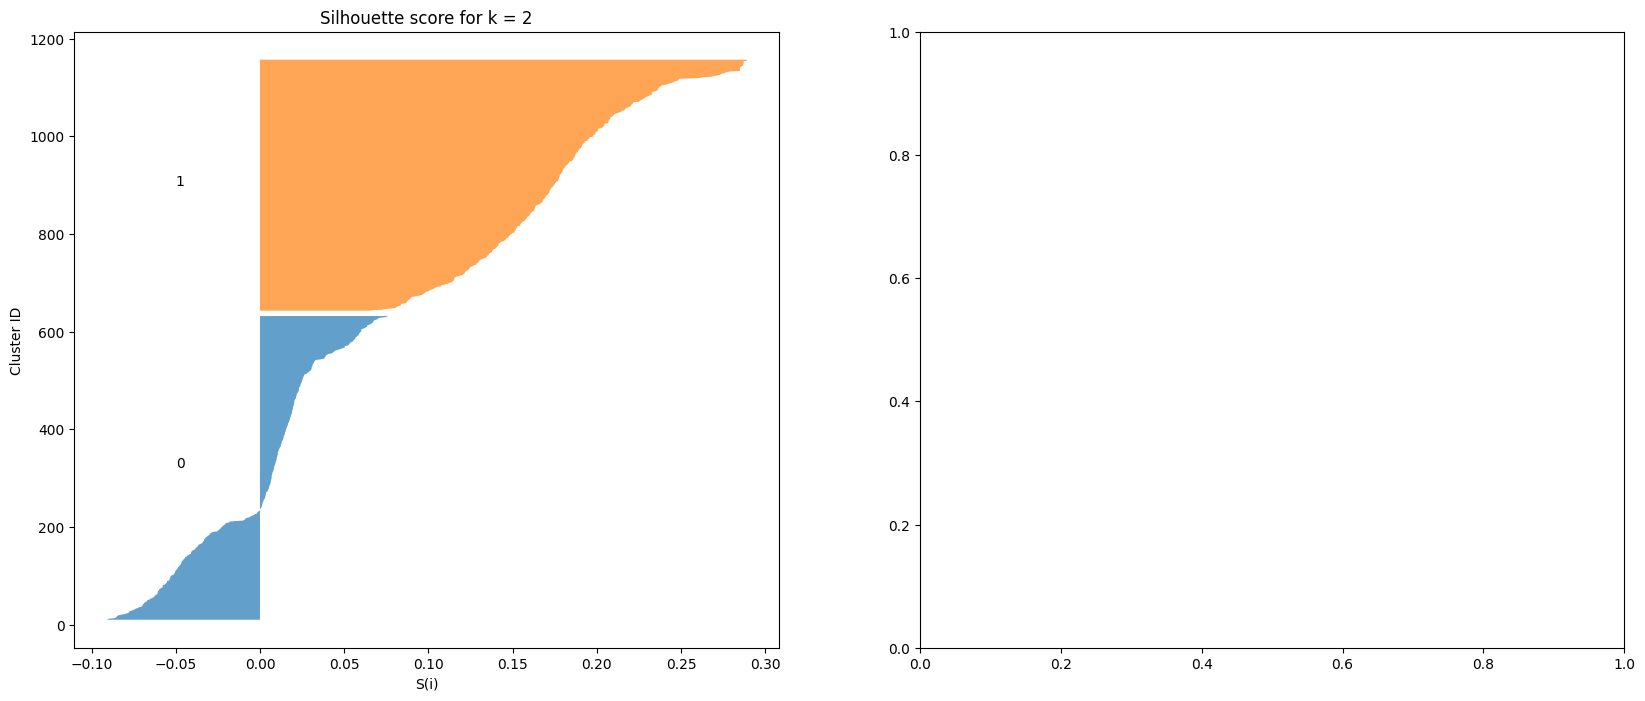

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 3 the average to silhouette is: 0.0464
	- For cluster = 0 the silhouette value is: -0.02
	- For cluster = 1 the silhouette value is: 0.03
	- For cluster = 2 the silhouette value is: 0.11


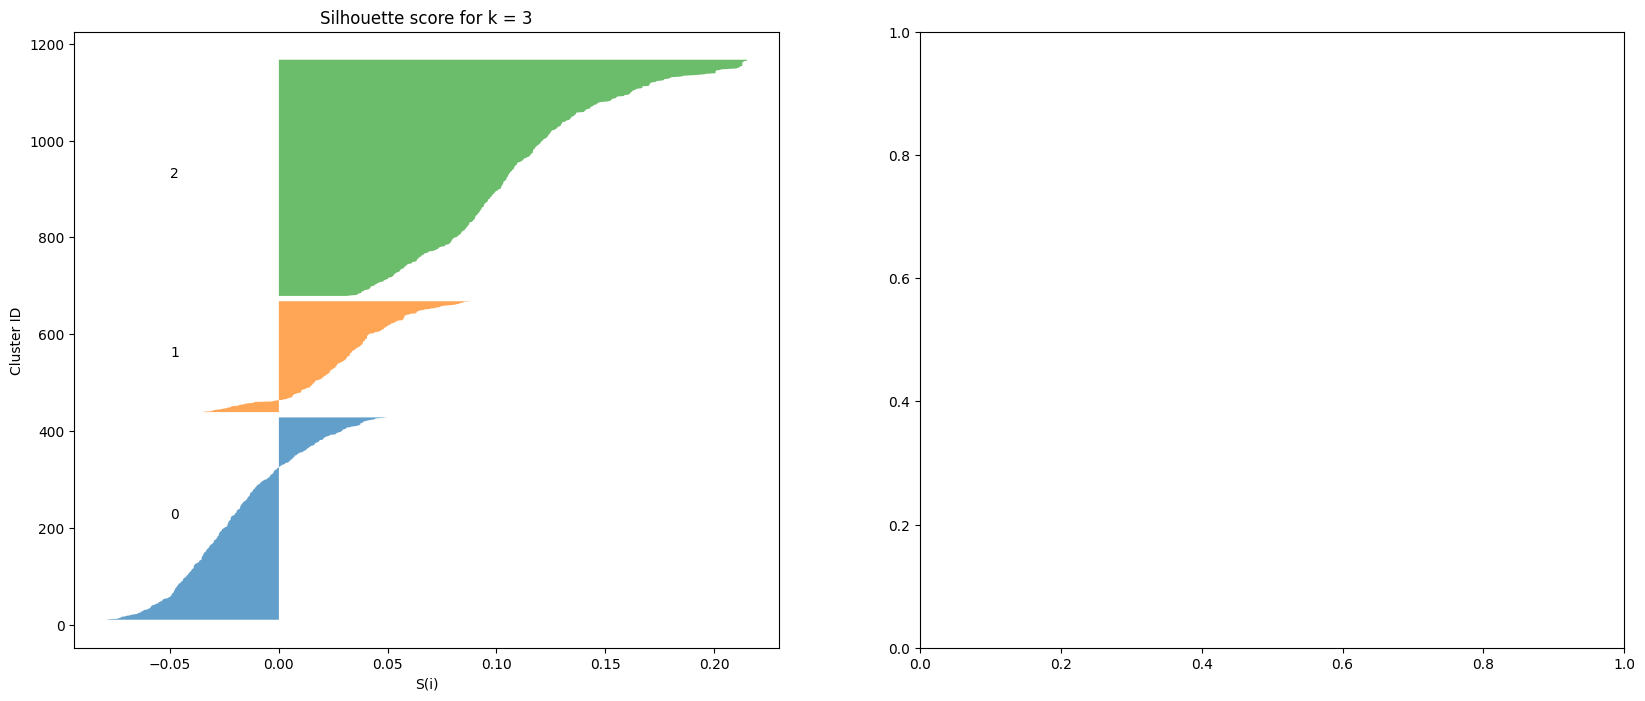

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 4 the average to silhouette is: 0.0324
	- For cluster = 0 the silhouette value is: 0.19
	- For cluster = 1 the silhouette value is: -0.04
	- For cluster = 2 the silhouette value is: -0.04
	- For cluster = 3 the silhouette value is: -0.0


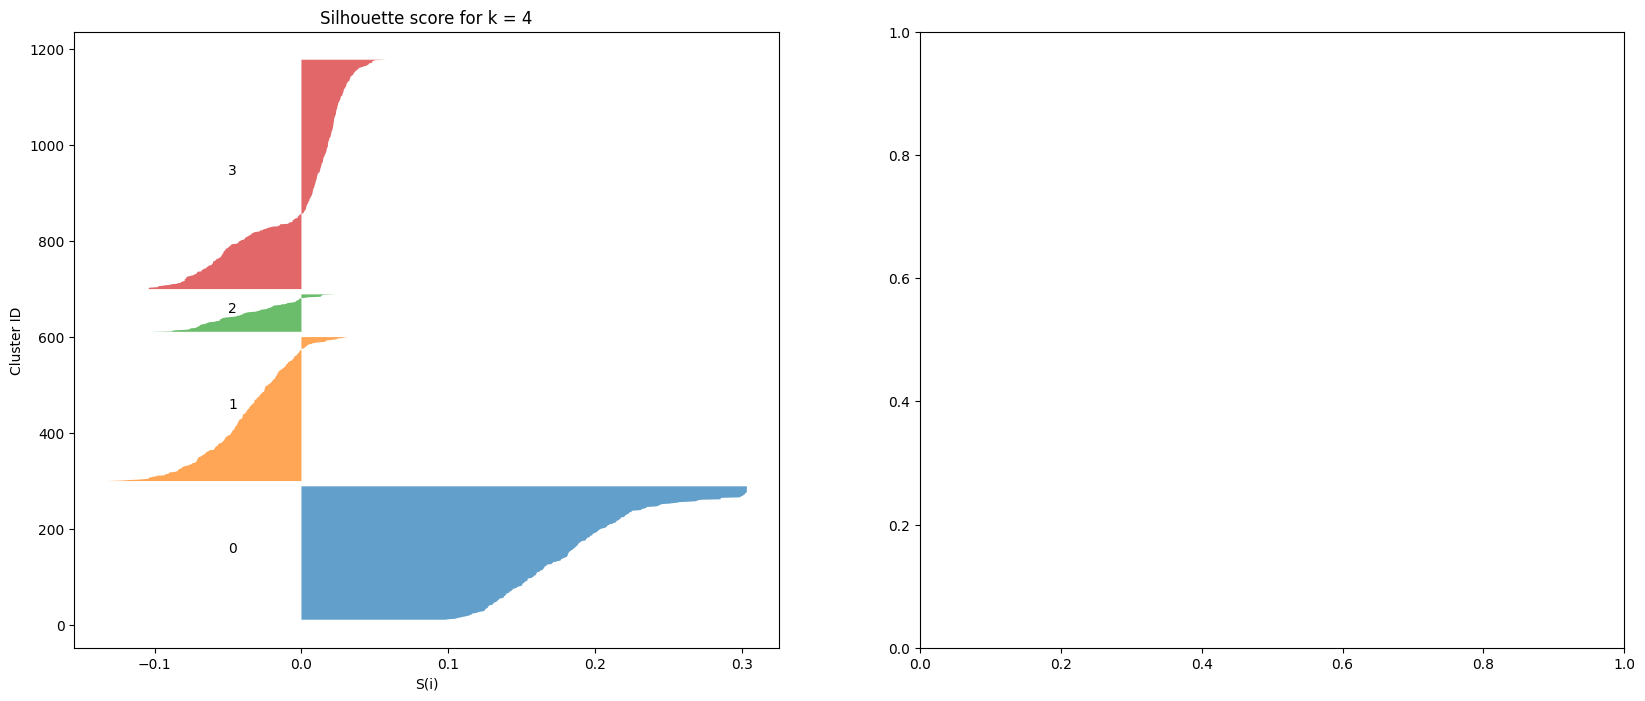

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 5 the average to silhouette is: 0.0352
	- For cluster = 0 the silhouette value is: 0.18
	- For cluster = 1 the silhouette value is: -0.04
	- For cluster = 2 the silhouette value is: -0.02
	- For cluster = 3 the silhouette value is: -0.02
	- For cluster = 4 the silhouette value is: 0.03


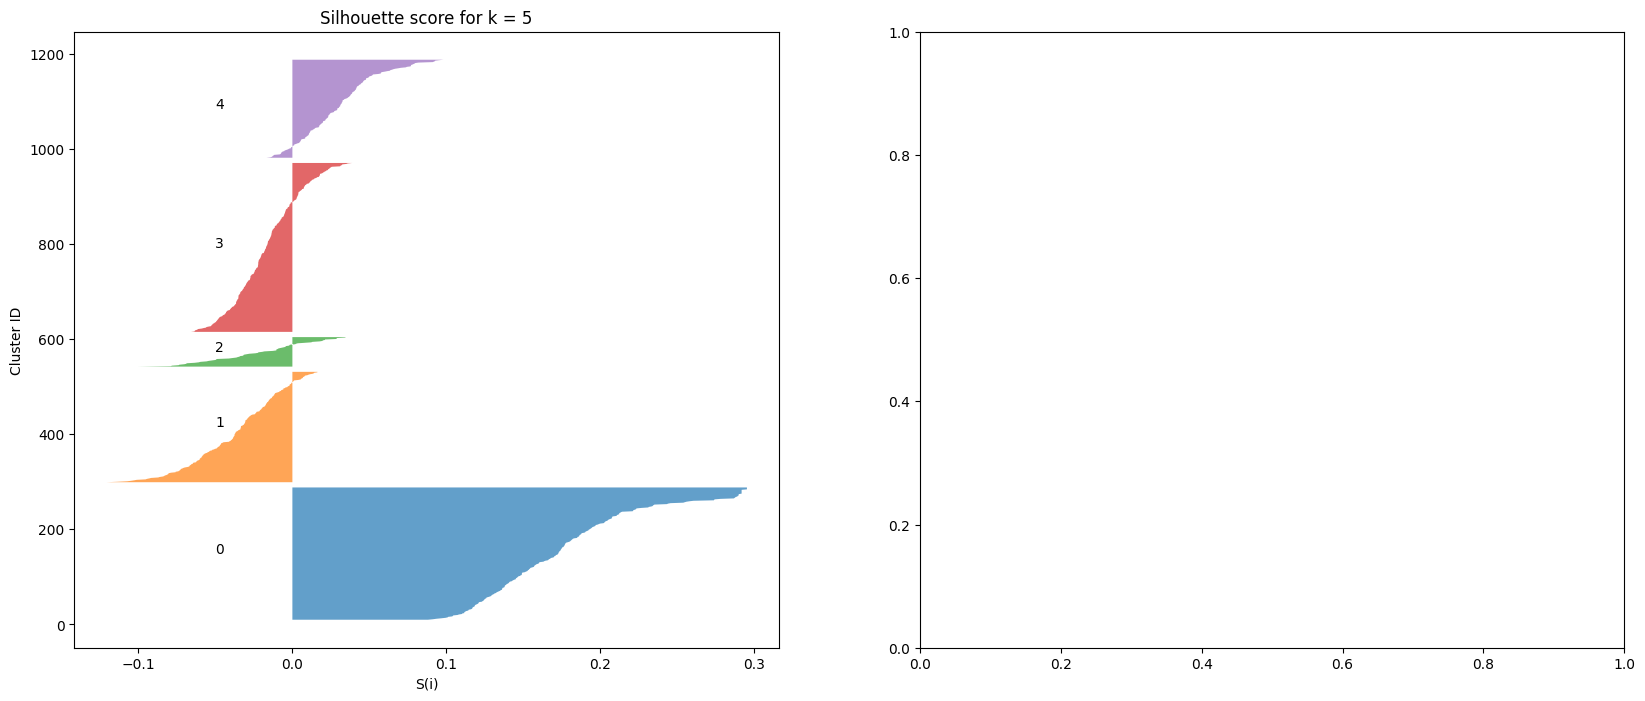

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 6 the average to silhouette is: 0.0375
	- For cluster = 0 the silhouette value is: -0.04
	- For cluster = 1 the silhouette value is: 0.18
	- For cluster = 2 the silhouette value is: 0.03
	- For cluster = 3 the silhouette value is: -0.03
	- For cluster = 4 the silhouette value is: 0.0
	- For cluster = 5 the silhouette value is: -0.03


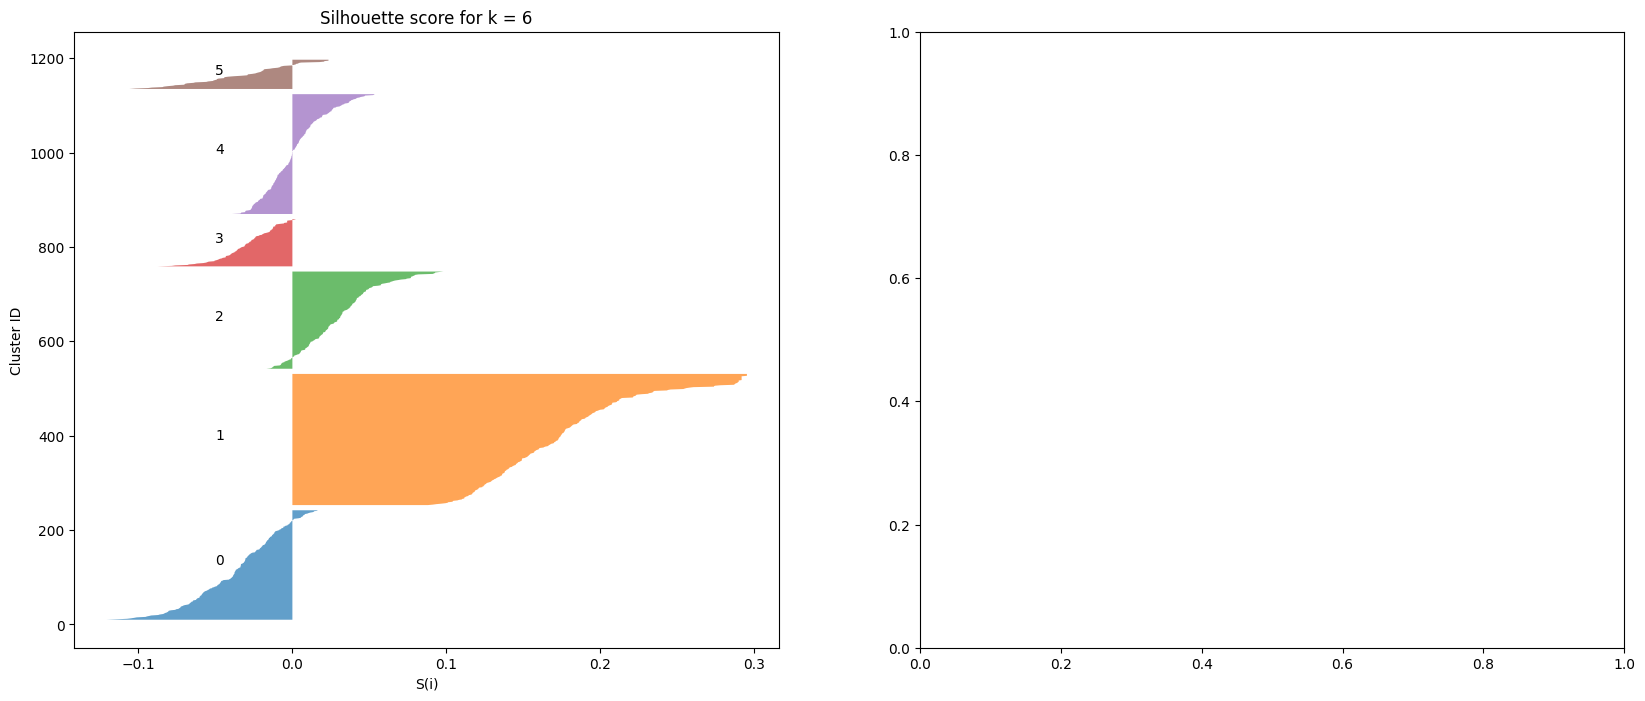

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 7 the average to silhouette is: 0.033
	- For cluster = 0 the silhouette value is: -0.02
	- For cluster = 1 the silhouette value is: 1.0
	- For cluster = 2 the silhouette value is: -0.04
	- For cluster = 3 the silhouette value is: 0.15
	- For cluster = 4 the silhouette value is: -0.02
	- For cluster = 5 the silhouette value is: 0.08
	- For cluster = 6 the silhouette value is: 0.03


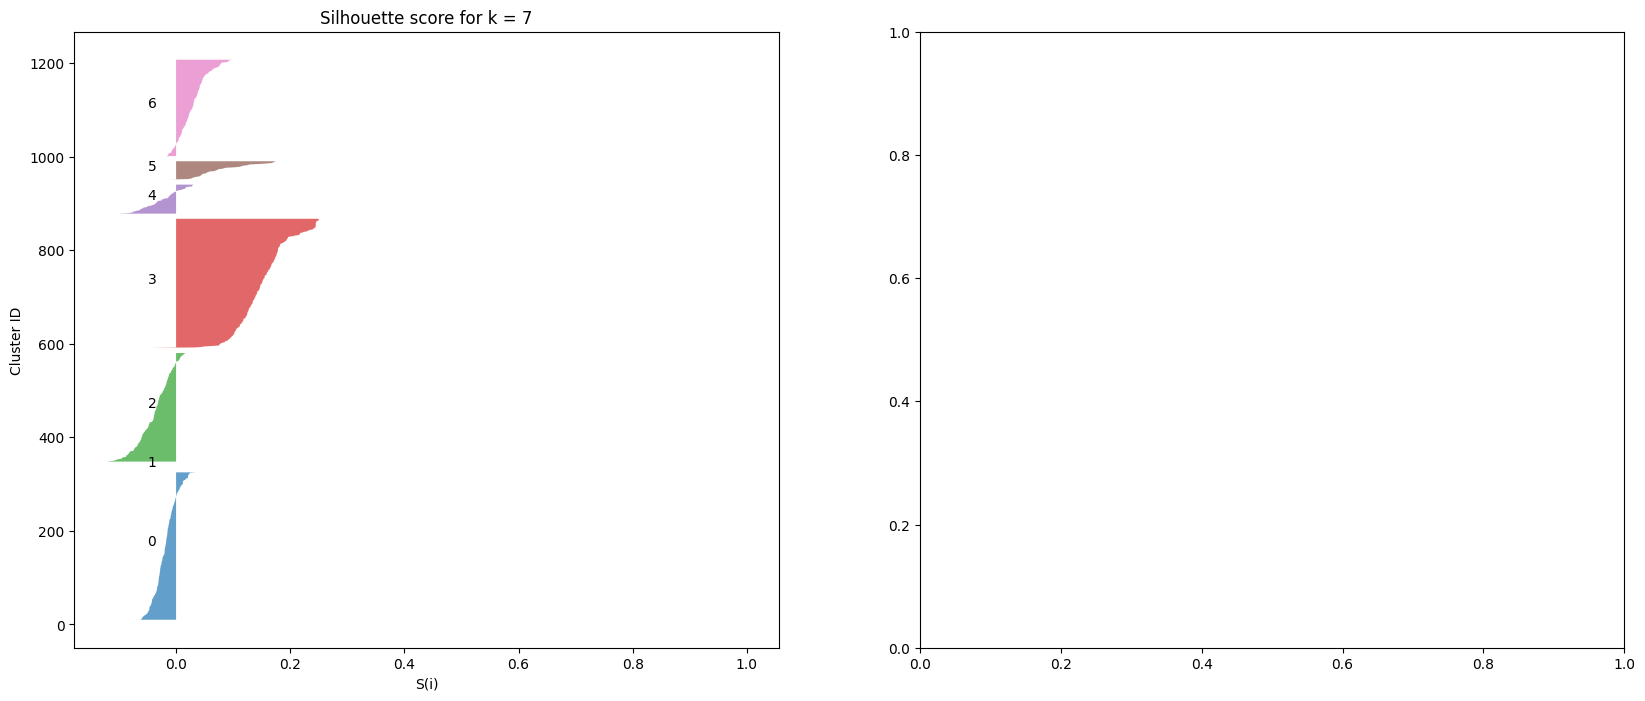

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 8 the average to silhouette is: 0.0386
	- For cluster = 0 the silhouette value is: 0.18
	- For cluster = 1 the silhouette value is: 0.0
	- For cluster = 2 the silhouette value is: -0.04
	- For cluster = 3 the silhouette value is: -0.03
	- For cluster = 4 the silhouette value is: -0.02
	- For cluster = 5 the silhouette value is: -0.04
	- For cluster = 6 the silhouette value is: 0.03
	- For cluster = 7 the silhouette value is: 0.58


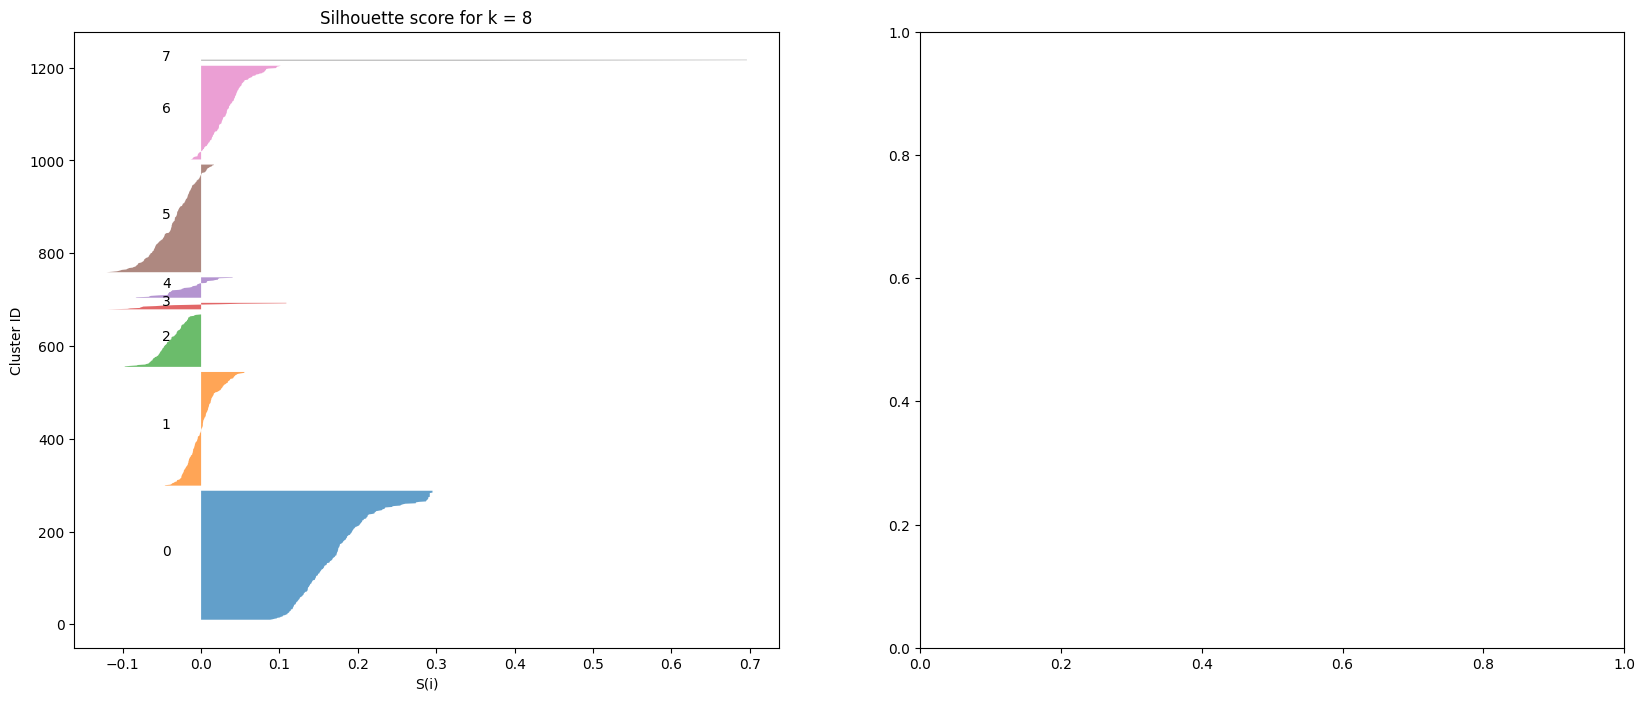

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 9 the average to silhouette is: 0.0406
	- For cluster = 0 the silhouette value is: 0.33
	- For cluster = 1 the silhouette value is: 0.03
	- For cluster = 2 the silhouette value is: -0.04
	- For cluster = 3 the silhouette value is: -0.05
	- For cluster = 4 the silhouette value is: 0.18
	- For cluster = 5 the silhouette value is: 0.04
	- For cluster = 6 the silhouette value is: -0.01
	- For cluster = 7 the silhouette value is: 0.03
	- For cluster = 8 the silhouette value is: -0.02


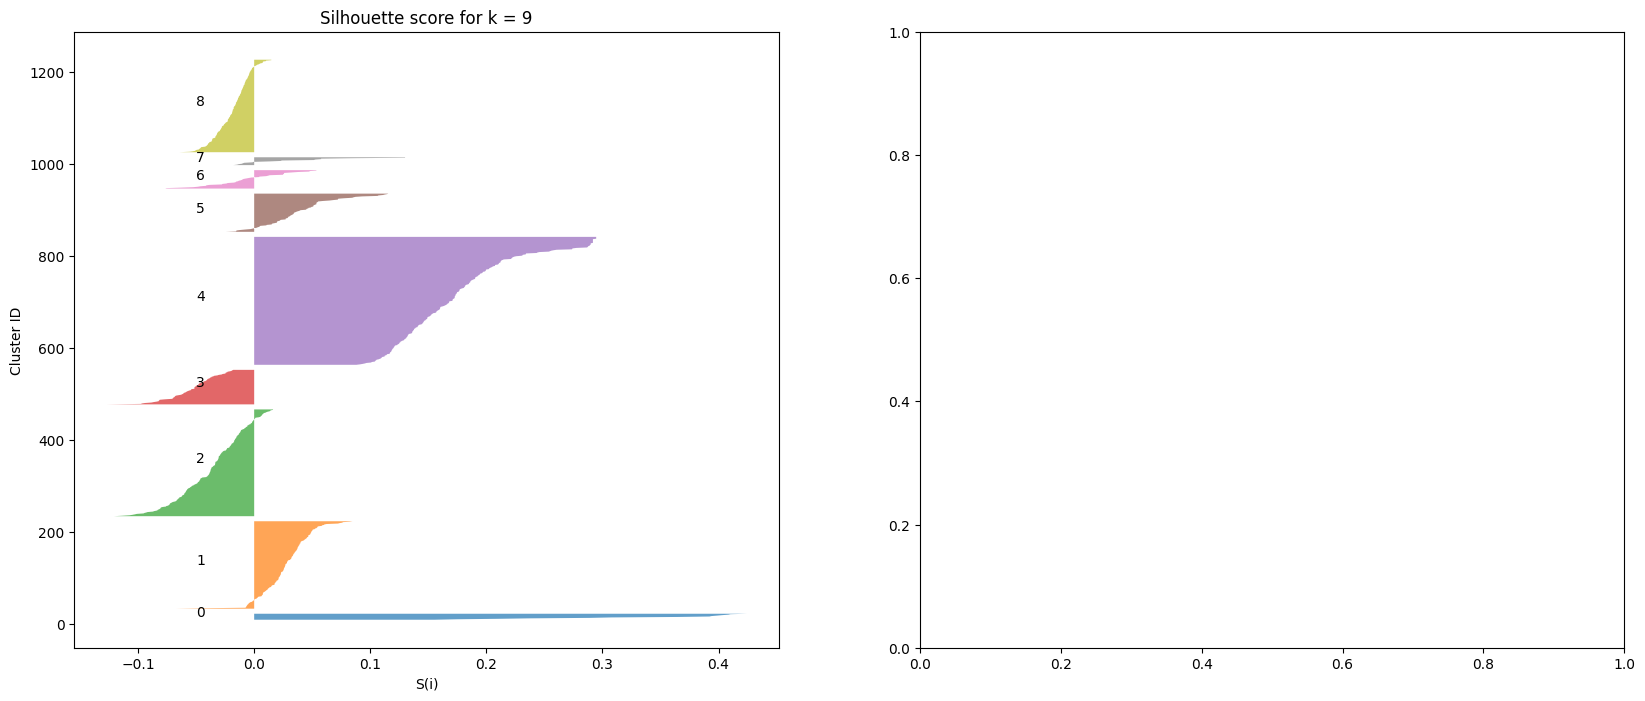

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 10 the average to silhouette is: 0.0363
	- For cluster = 0 the silhouette value is: 0.03
	- For cluster = 1 the silhouette value is: 0.17
	- For cluster = 2 the silhouette value is: 0.02
	- For cluster = 3 the silhouette value is: -0.05
	- For cluster = 4 the silhouette value is: -0.04
	- For cluster = 5 the silhouette value is: 0.03
	- For cluster = 6 the silhouette value is: -0.04
	- For cluster = 7 the silhouette value is: -0.04
	- For cluster = 8 the silhouette value is: 0.0
	- For cluster = 9 the silhouette value is: 0.29


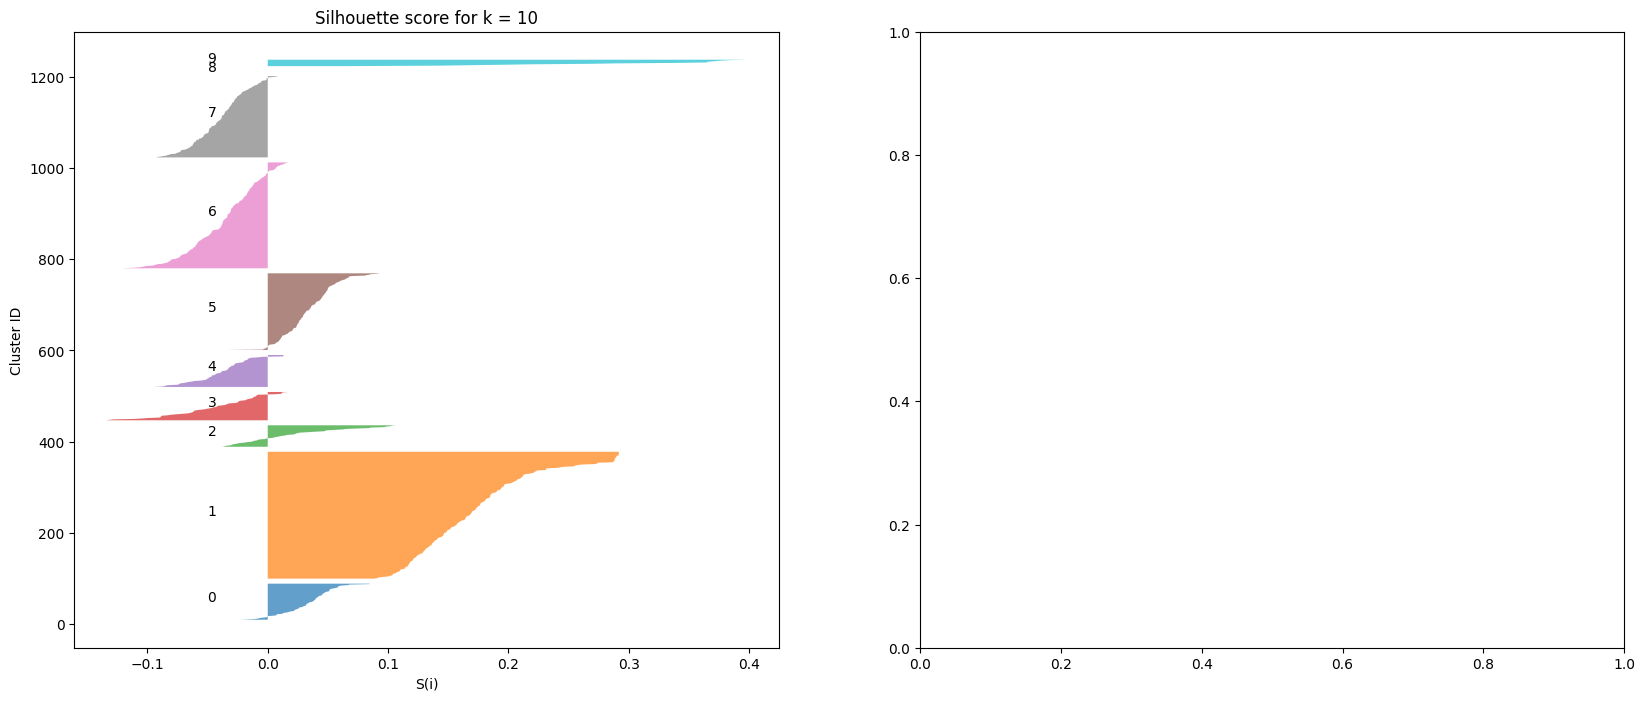

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 11 the average to silhouette is: 0.0384
	- For cluster = 0 the silhouette value is: 0.04
	- For cluster = 1 the silhouette value is: -0.03
	- For cluster = 2 the silhouette value is: -0.02
	- For cluster = 3 the silhouette value is: 0.17
	- For cluster = 4 the silhouette value is: 0.0
	- For cluster = 5 the silhouette value is: -0.0
	- For cluster = 6 the silhouette value is: 0.03
	- For cluster = 7 the silhouette value is: -0.03
	- For cluster = 8 the silhouette value is: 0.08
	- For cluster = 9 the silhouette value is: -0.05
	- For cluster = 10 the silhouette value is: 0.28


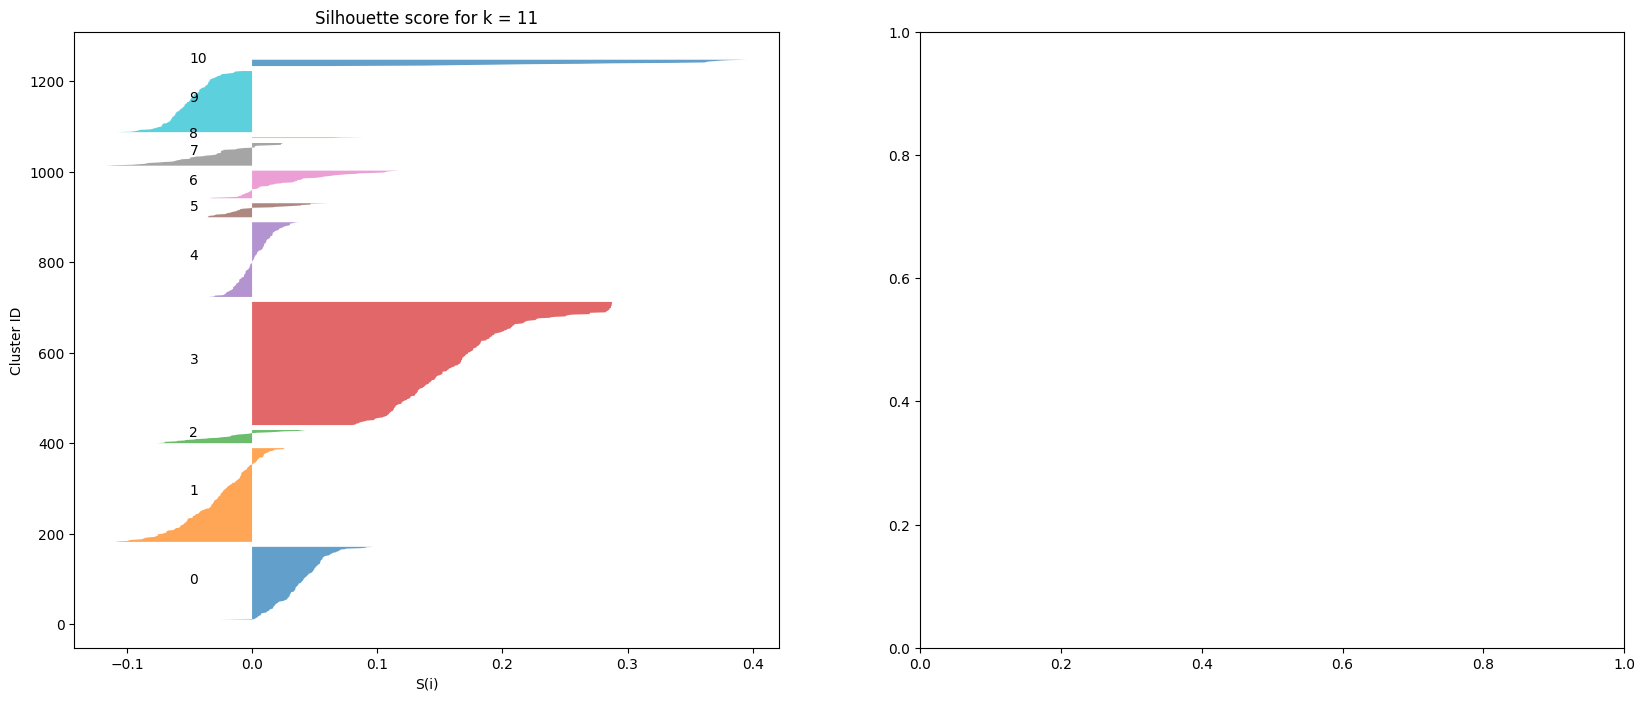

In [ ]:
#@title Silhouette Score Plots
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 12
data = skincare_encode_df

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

        plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

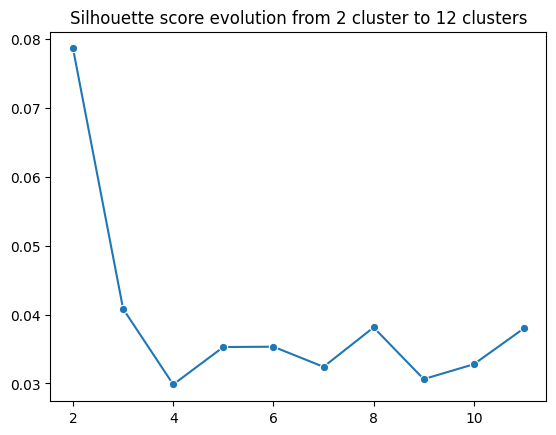

In [ ]:
#@title Silhouette Score Plots
max_k = 12
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(skincare_encode_df).labels_
    sil_score.append(silhouette_score(skincare_encode_df, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

# KMeans Distances


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

#removing the cluster column
skincare_encode_no_cluster = skincare_encode_df.copy() 
skincare_encode_no_cluster
skincare_encode_no_cluster.drop(["cluster"], axis=1, inplace = True)

# Calculate the distances
distances = skincare_kmeans.transform(skincare_encode_no_cluster)

# Add the distances as a new column
skincare_encode_df['distance'] = distances.min(axis=1)

In [ ]:
skincare_encode_df.head(2)

"cire dabeille)"  1-methylhydantoin-2-imide  10-decanediol  10-hydroxydecanoic acid  2  2-bromo-2-nitropropane-1  2-butanediol)-4 peg/ppg-29/9 methylglucose  2-dimethylhydrocinnamal  2-hexanediol  2-oleamido-1  3-diol  3-o-ethyl ascorbic acid  3-octadecanediol  4-dicarboxylate  4-t-butylcyclohexanol  6-dimethyl-7-octen-2-ol  6-naphthalate  7-dehydrocholesterol  abies alba leaf oil  abies balsamea extract  abies sibirica oil  acacia concinna fruit extract  acacia decurrens wax  acacia senegal gum  acacia seyal gum extract  acer saccharum extract  acetate  acetone  acetum  acetyl carnitine  acetyl dipeptide-1 cetyl  acetyl farnesylcysteine  acetyl glucosamine  acetyl glutamine  acetyl heptapeptide-4  acetyl hexapeptide-1  acetyl hexapeptide-37  acetyl hexapeptide-49  acetyl hexapeptide-8  acetyl hydroxyproline  acetyl octapeptide-3  acetyl pentapeptide  acetyl tetrapeptide-15  acetyl tetrapeptide-2  acetyl tetrapeptide-3  acetyl tetrapeptide-40  acetyl tetrapeptide-5  \
0                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   
1                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0                     0                   0                         0                       0        0        0       0                 0                         0                        0                   0                 0                      0                     0                      0                      0                     0                      0                     0                    0                       0                      0                      0                       0                      0   

   acetyl tetrapeptide-9  acetyl tributyl citrate  acetyl trifluoromethylphenyl valylglycine  acetyl tripeptide-30  acetyl tyrosine  acetylarginyltryptophyl diphenylglycine  acetylated glycol stearate  achillea millefolium extract  acorus calamus (sweet flag) root extract  acrylamide/sodium  acrylate crosspolymer  acrylate/acrylic acid copolymer  acrylates /c10-30 alkyl acrylate crosspolymer  acrylates copolymer  acrylates crosspolymer-4  acrylates/ c10-30 alkyl acrylate crosspolymer  acrylates/ palmeth-25 acrylate copolymer  acrylates/ammonium methacrylate copolymer  acrylates/beheneth-25 methacrylate copolymer  acrylates/c1-3 alkyl acrylate crosspolymer  acrylates/c10-30 alkyl  acrylates/c12-22 alkyl methacrylate copolymer  acrylates/octylacrylamide copolymer  acrylates/polytrimethylsiloxymethacrylate copolymer  acrylates/steareth-20 methacrylate crosspolymer  acrylates/vinyl isodecanoate crosspolymer  acrylic acid/vp crosspolymer  acryloyldimethyl taurate copolymer  \
0                      0                        0         

In [ ]:
skincare_clusters = pd.merge(skincare, skincare_encode_df, left_index=True, right_index=True)
skincare_clusters.head(1)

product_name                                                                                    product_url product_type  price         ingredient_1   ingredient_2 ingredient_3     ingredient_4 ingredient_5        ingredient_6 ingredient_7   ingredient_8 ingredient_9 ingredient_10 ingredient_11 ingredient_12 ingredient_13 ingredient_14 ingredient_15 ingredient_16  ingredient_17 ingredient_18 ingredient_19 ingredient_20 ingredient_21 ingredient_22 ingredient_23   ingredient_24 ingredient_25 ingredient_26  ingredient_27 ingredient_28                  ingredient_29  ingredient_30 ingredient_31 ingredient_32 ingredient_33 ingredient_34 ingredient_35 ingredient_36   ingredient_37    ingredient_38 ingredient_39                          ingredient_40     ingredient_41    ingredient_42     ingredient_43   ingredient_44  ingredient_45 ingredient_46 ingredient_47 ingredient_48 ingredient_49 ingredient_50 ingredient_51 ingredient_52 ingredient_53  \
0  The Ordinary Natural Moisturising Factors + HA 30ml  https://www.lookfantastic.com/the-ordinary-natural-moisturising-factors-ha-30ml/11396687.html  Moisturiser  £5.20  capric triglyceride  cetyl alcohol  propanediol  stearyl alcohol     glycerin  sodium hyaluronate     arganine  aspartic acid      glycine       alanine        serine        valine    isoleucine       proline     threonine     histidine  phenylalanine       glucose       maltose      fructose     trehalose    sodium pca           pca  sodium lactate          urea     allantoin  linoleic acid    oleic acid  phytosteryl canola glycerides  palmitic acid  stearic acid      lecithin      triolein    tocopherol      carbomer  isoceteth-20  polysorbate 60  sodium chloride   citric acid  trisodium ethylenediamine disuccinate  pentylene glycol  triethanolamine  sodium hydroxide  phenoxyethanol  chlorphenesin           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   

  ingredient_54 ingredient_55 ingredient_56 ingredient_57 ingredient_58 ingredient_59 ingredient_60 ingredient_61 ingredient_62 ingredient_63 ingredient_64 ingredient_65 ingredient_66 ingredient_67 ingredient_68 ingredient_69 ingredient_70 ingredient_71 ingredient_72 ingredient_73 ingredient_74 ingredient_75 ingredient_76 ingredient_77 ingredient_78 ingredient_79 ingredient_80 ingredient_81 ingredient_82 ingredient_83 ingredient_84 ingredient_85 ingredient_86 ingredient_87 ingredient_88 ingredient_89 ingredient_90  "cire dabeille)"  1-methylhydantoin-2-imide  10-decanediol  10-hydroxydecanoic acid  2  2-bromo-2-nitropropane-1  2-butanediol)-4 peg/ppg-29/9 methylglucose  2-dimethylhydrocinnamal  2-hexanediol  2-oleamido-1  3-diol  3-o-ethyl ascorbic acid  3-octadecanediol  4-dicarboxylate  4-t-butylcyclohexanol  6-dimethyl-7-octen-2-ol  6-naphthalate  7-dehydrocholesterol  abies alba leaf oil  abies balsamea extract  abies sibirica oil  acacia concinna fruit extract  \
0           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN                 0                          0              0                        0  0                         0                                           0                        0             0             0       0                        0                 0                0                      0                        0              0                     0                    0                       0                   0                              0   

   acacia decurrens wax  acacia senegal gum  acacia seyal gum extract  acer saccharu

In [ ]:
skincare_clusters["price"].sort_values(ascending=False)

85     £99.00
209    £96.00
227    £95.00
206    £92.00
170    £90.45
        ...  
460     £1.95
450     £1.95
454     £1.95
449     £1.95
453     £1.95
Name: price, Length: 1138, dtype: object

In [ ]:
skincare_clusters[['product_name', 'product_type', 'price', 'cluster', 'distance']][skincare_clusters['cluster'] == 1].sort_values("distance")

product_name product_type   price  cluster  distance
337  Revolution Skincare x Jake Jamie Tropical Quench Essence Spray 100ml         Mist   £6.00        1  2.712029
887                                      Holika Holika Less On Skin Toner        Toner  £21.95        1  2.722853
142               VICHY Minéral 89 Hyaluronic Acid Hydration Booster 75ml        Serum  £30.00        1  2.739008
124               VICHY Minéral 89 Hyaluronic Acid Hydration Booster 50ml        Serum  £25.00        1  2.739008
178             SkinCeuticals Discoloration Defense Corrective Serum 30ml        Serum  £85.00        1  3.039318
..                                                                    ...          ...     ...      ...       ...
477         Dermalogica Age Smart Multivitamin Power Recovery Masque 75ml         Mask  £44.55        1  6.480000
792                             Murad Time Release Blemish Cleanser 200ml     Cleanser  £30.00        1  6.772074
872                          Holika Holika Good Cera Super Ceramide Toner        Toner  £19.95        1  6.815367
73                                          Dr.Jart+ Ceramidin Cream 50ml  Moisturiser  £35.50        1  7.470478
925                                           Filorga Scrub and Mask 55ml   Exfoliator  £44.00        1  8.961476

[340 rows x 5 columns]

In [ ]:
skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])

In [ ]:
path = "/content/drive/MyDrive/Final Project"

skincare_encode_df.to_csv(path+"/skincare_encode_df.csv")
skincare_clusters.to_csv(path+"/skincare_clusters.csv")

# New Section

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Define the dataset and the selected point
data = skincare_encode_df.drop(['cluster','distance'], axis=1)
name = "Acorelle Pure Harvest Body Perfume - 100ml"
point = skincare_clusters.loc[skincare_clusters['product_name'] == name, skincare_clusters.columns != 'name']
point.drop(['cluster','distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
       'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == name].values[0]
points_with_same_cluster = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
points_with_same_cluster.drop(['cluster','distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
       'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

# Obtain the final positions of the centroids
centroids = skincare_kmeans.cluster_centers_

# Calculate the Euclidean distance between the selected point and each centroid
distances_centroids = euclidean_distances(point, centroids)

# Calculate the Euclidean distance between the selected point and all other points 
distances_to_all_points = euclidean_distances(point, data)

# Calculate the Euclidean distance between the selected point and all other points in the same cluster
cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == name].values[0]

distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)



<ipython-input-47-b052ca975bc0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_with_same_cluster.drop(['cluster','distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'i

In [ ]:
distances_centroids_sort = np.sort(distances_centroids)
distances_centroids_sort

array([[1.97492666, 2.11525293, 2.34433449, 2.5614422 , 3.68580556]])

In [ ]:
pd.set_option('max_seq_items', None)

distances_to_all_points_sort = np.sort(distances_to_all_points)
distances_to_all_points_sort

array([[0.        , 2.        , 2.23606798, ..., 8.77496439, 9.32737905,
        9.53939201]])

In [ ]:
distances_to_all_points_same_cluster_sort = np.sort(distances_to_all_points_same_cluster)
distances_to_all_points_same_cluster_sort

array([[0.        , 2.        , 2.44948974, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 2.44948974, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 2.44948974, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 2.44948974, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 2.44948974, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 2.64575131, 2.64575131, 2.64575131,
        2.64575131, 2.64575131, 2.82842712, 2.82842712, 2.82842712,
        2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
        2.82842712, 2.82842712, 2.82842712, 3.        , 3.        ,
        3.        , 3.        , 3.        , 3.        , 3.        ,
        3.        , 3.16227766, 3.16227766, 3.16227766, 3.16227766,
        3.16227766, 3.16227766, 3.16227766, 3.31662479, 3.31662479,
        3.31662479, 3.31662479, 3.31662479, 3.31662479, 3.31662479,
        3.31662479, 3.31662479, 3.31662479, 3.31662479, 3.31662479,
        3.31662479, 3.31662479, 3.31662479, 3.46

# Recommenders - Not including price

In [ ]:
def similar_skincare_same_product(product_name):
  
  #create a point/data for the imputed fragrance name
  point = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
  #select the product type
  product_type = point.iloc[0]['product_type']
  #drop
  point.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
        'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #get the cluster number from the inputed fragrance name 
  cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

  #store dataframe with only the cluster from the inputed fragrance (for use in final result)
  skincare_clusters_input = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
    
  #create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
  points_with_same_cluster = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  points_with_same_cluster = skincare_clusters.loc[skincare_clusters['product_type'] == product_type]
  points_with_same_cluster.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
          'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #calculate the euclidean distance between the selected point and all other points in the same cluster
  distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)

  ed_list = distances_to_all_points_same_cluster.tolist()
  df_ed = pd.DataFrame(ed_list)
  df_ed = df_ed.melt()    

  results = pd.merge(skincare_clusters_input, df_ed, left_index=True, right_index=True)[["product_name", "product_type", "price", "value"]]
  results_1 = results.sort_values("value").head(5)
  results_1.drop(["value"], axis=1, inplace=True)

  return results_1

In [ ]:
similar_skincare_same_product("Neutrogena Refreshingly Clear Oil-Free Moisturiser 50ml")

<ipython-input-51-dd4c1a4ee832>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_with_same_cluster.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_

product_name product_type  price
60       Neutrogena Refreshingly Clear Oil-Free Moisturiser 50ml  Moisturiser   5.24
37                                  The INKEY List Snow Mushroom  Moisturiser   9.99
22                    La Roche-Posay Effaclar H Moisturiser 40ml  Moisturiser   9.99
36  La Roche-Posay Effaclar K(+) Anti-Blackhead Moisturiser 40ml  Moisturiser  17.00
11                                CeraVe Moisturising Cream 340g  Moisturiser  13.00

In [ ]:
def similar_skincare_other_products(product_name):
  
  #create a point/data for the imputed fragrance name
  point = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
  #select the product type
  product_type = point.iloc[0]['product_type']
  #drop
  point.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
        'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #get the cluster number from the inputed fragrance name 
  cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

  #store dataframe with only the cluster from the inputed fragrance (for use in final result)
  skincare_clusters_input = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
    
  #create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
  points_with_same_cluster = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  points_with_same_cluster = skincare_clusters.loc[skincare_clusters['product_type'] != product_type]
  points_with_same_cluster.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
          'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #calculate the euclidean distance between the selected point and all other points in the same cluster
  distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)

  ed_list = distances_to_all_points_same_cluster.tolist()
  df_ed = pd.DataFrame(ed_list)
  df_ed = df_ed.melt()    

  results = pd.merge(skincare_clusters_input, df_ed, left_index=True, right_index=True)[["product_name", "product_type", "price", "value"]]
  results_1 = results.sort_values("value").head(5)
  results_1.drop(["value"], axis=1, inplace=True)

  return results_1

In [ ]:
similar_skincare_other_products("Neutrogena Refreshingly Clear Oil-Free Moisturiser 50ml")

<ipython-input-53-761ca13228fe>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_with_same_cluster.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_

product_name product_type  price
222  L'Oréal Paris Revitalift Filler + Hyaluronic Acid Replumping Serum 16ml        Serum  19.99
594                                  Natura Bissé Tolerance Enzyme Peel 50ml         Peel  89.00
601                                             CeraVe Eye Repair Cream 14ml     Eye Care  12.00
538                   Neutrogena Purifying Boost Hydrogel Recovery Mask 30ml         Mask   3.99
617                   L’Oréal Paris Revitalift Filler Renew Eye Cream (15ml)     Eye Care  19.99

# Recommender for same product type and includes price

In [ ]:
def similar_skincare_same_product(product_name, min_price=None, max_price=None):

  #price column in numeric
  skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
  skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])
  
  #create a point/data for the imputed fragrance name
  point = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
  #select the product type
  product_type = point.iloc[0]['product_type']
  #drop
  point.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
        'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #get the cluster number from the inputed fragrance name 
  cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

  #store dataframe with only the cluster from the inputed fragrance (for use in final result)
  skincare_clusters_input = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  skincare_clusters_input = skincare_clusters_input.loc[skincare_clusters_input['product_type'] == product_type]
  print(skincare_clusters_input.head())
    
  #create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
  points_with_same_cluster = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  points_with_same_cluster = points_with_same_cluster.loc[points_with_same_cluster['product_type'] == product_type]
  points_with_same_cluster.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                                 'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #calculate the euclidean distance between the selected point and all other points in the same cluster
  distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)

  ed_list = distances_to_all_points_same_cluster.tolist()
  df_ed = pd.DataFrame(ed_list)
  df_ed = df_ed.melt()    

  results = pd.merge(skincare_clusters_input, df_ed, left_index=True, right_index=True)[["product_name", "product_type", "price", "value"]]
  results_1 = results.loc[(results['price'] >= min_price) & (results['price'] <= max_price)]
  results_2 = results_1.sort_values("value").head(5)
  #results_2.drop(["value"], axis=1, inplace=True)

  #return results_2

In [ ]:
similar_skincare_same_product("The Ordinary Natural Moisturising Factors + HA 30ml", 2, 100)

In [ ]:
similar_skincare_same_product("L'Oréal Paris Extraordinary Oil Cream 50ml", 2, 100)

Empty DataFrame
Columns: [product_name, product_type, price, value]
Index: []

In [ ]:
similar_skincare_same_product("Avène Aqua Gel 50ml", 2, 100)

product_name product_type  price     value
2   The Ordinary Hyaluronic Acid 2% + B5 Hydration Support Formula 30ml  Moisturiser   6.20  5.916080
36         La Roche-Posay Effaclar K(+) Anti-Blackhead Moisturiser 40ml  Moisturiser  17.00  6.000000
5                                      CeraVe Moisturising Lotion 473ml  Moisturiser  15.00  6.082763
44                                Skin Doctors Sd White & Bright (50ml)  Moisturiser  21.99  6.164414
15                           First Aid Beauty Ultra Repair Cream (170g)  Moisturiser  25.00  6.164414

# Recommender for different product types and includes price

In [ ]:
def similar_skincare_other_products(product_name, min_price=None, max_price=None):

  #price column in numeric
  skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
  skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])
  
  #create a point/data for the imputed fragrance name
  point_other = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
  #select the product type
  product_type = point_other.iloc[0]['product_type']
  #drop
  point_other.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                  'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

  #get the cluster number from the inputed fragrance name 
  cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

  #store dataframe with only the cluster from the inputed fragrance (for use in final result)
  # skincare_clusters_input_other = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  # skincare_clusters_input_other_1 = skincare_clusters_input_other.loc[skincare_clusters_input_other['product_type']!= product_type]

  skincare_clusters_input_other = skincare_clusters.loc[skincare_clusters['product_type']!= product_type]
    
  #create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
  points_with_same_cluster_other = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
  points_with_same_cluster_other_1 = points_with_same_cluster_other.loc[points_with_same_cluster_other['product_type'] != product_type]
  points_with_same_cluster_other_1.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                                       'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

 #calculate the euclidean distance between the selected point and all other points in the same cluster
  distances_to_all_points_same_cluster_other = euclidean_distances(point_other, points_with_same_cluster_other_1)

  ed_list_other = distances_to_all_points_same_cluster_other.tolist()
  df_ed_other = pd.DataFrame(ed_list_other)
  df_ed_other = df_ed_other.melt()    

  results_other = pd.merge(skincare_clusters_input_other, df_ed_other, left_index=True, right_index=True)[["product_name", "product_type", "price", "value"]]
  results_1_other = results_other.loc[(results_other['price'] >= min_price) & (results_other['price'] <= max_price)]
  results_2_other = results_1_other.sort_values("value").head(10)
  #results_2_other.drop(["value"], axis=1, inplace=True)

  return results_2_other

In [ ]:
similar_skincare_other_products("The Ordinary Natural Moisturising Factors + HA 30ml", 2, 100)

<ipython-input-125-0d3146acbd5b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_with_same_cluster_other_1.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'in

product_name product_type  price     value
279                                           L'Oréal Paris Extraordinary Oil Cream 50ml          Oil  14.99  6.557439
176                                 Elizabeth Arden SuperStart Skin Renewal Booster 50ml        Serum  60.00  6.708204
195                                             Liz Earle Superskin Face Serum 30ml Pump        Serum  45.00  6.782330
159  Elizabeth Arden Skin Illuminating Advanced Brightening Night Capsules (50 Capsules)        Serum  60.00  7.000000
257                                           Trilogy Certified Organic Rosehip Oil 45ml          Oil  34.50  7.000000
179                              Aurelia Probiotic Skincare Revitalise & Glow Serum 30ml        Serum  51.20  7.000000
249                                          Caudalie VineActiv Overnight Detox Oil 30ml          Oil  30.00  7.000000
248                                          TanOrganic Self-Tanning Oil - Brown (100ml)          Oil  18.74  7.000000
148                                       Sanctuary Spa Hyaluronic Wonder Oil Serum 30ml        Serum  20.00  7.071068
265                                          Sanctuary Spa Melt Away Cleansing Oil 150ml          Oil  12.00  7.071068

In [ ]:
product_name = 'Sanctuary Spa Melt Away Cleansing Oil 150ml'
min_price = 10
max_price = 200

#price column in numeric
skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])
  
#create a point/data for the imputed fragrance name
point_other = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
#select the product type
product_type = point_other.iloc[0]['product_type']
#drop
point_other.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                  'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

#get the cluster number from the inputed fragrance name 
cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

#store dataframe with only the cluster from the inputed fragrance (for use in final result)
# skincare_clusters_input_other = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
# skincare_clusters_input_other_1 = skincare_clusters_input_other.loc[skincare_clusters_input_other['product_type']!= product_type]

skincare_clusters_input_other = skincare_clusters.loc[skincare_clusters['product_type']!= product_type]
    
#create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
points_with_same_cluster_other = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
points_with_same_cluster_other_1 = points_with_same_cluster_other.loc[points_with_same_cluster_other['product_type'] != product_type]
points_with_same_cluster_other_1.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                                       'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

#calculate the euclidean distance between the selected point and all other points in the same cluster
distances_to_all_points_same_cluster_other = euclidean_distances(point_other, points_with_same_cluster_other_1)

ed_list_other = distances_to_all_points_same_cluster_other.tolist()
# df_ed_other = pd.DataFrame(ed_list_other)
# df_ed_other = df_ed_other.melt()    


results_other = pd.merge(skincare_clusters_input_other, df_ed_other, left_index=True, right_index=True)[["product_name", "product_type", "price", "value"]]
results_1_other = results_other.loc[(results_other['price'] >= min_price) & (results_other['price'] <= max_price)]
results_2_other = results_1_other.sort_values("value")
#results_2_other.drop(["value"], axis=1, inplace=True)

results_2_other

<ipython-input-104-9d8cc8453925>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_with_same_cluster_other_1.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'in

product_name product_type  price     value
178          SkinCeuticals Discoloration Defense Corrective Serum 30ml        Serum   85.0  4.000000
176               Elizabeth Arden SuperStart Skin Renewal Booster 50ml        Serum   60.0  4.242641
184                     Caudalie Resvératrol Lift Firming Serum (30ml)        Serum   46.0  4.242641
179            Aurelia Probiotic Skincare Revitalise & Glow Serum 30ml        Serum   51.2  4.242641
152                     REN Clean Skincare Evercalm Anti-Redness Serum        Serum   32.0  4.358899
..                                                                 ...          ...    ...       ...
89                      COSRX Advanced Snail 92 All in One Cream 100ml  Moisturiser   27.0  7.211103
69   Elizabeth Arden Visible Difference Refining Moisture Cream (75ml)  Moisturiser   30.0  7.280110
104                             Elemis Peptide4 Plumping Pillow Facial  Moisturiser   52.0  7.280110
96                       Avène Rich Revitalizing Nourishing Cream 50ml  Moisturiser   17.5  7.549834
50                Mama Mio The Tummy Rub Butter 120ml - Fragrance Free  Moisturiser   24.0  8.246211

[169 rows x 4 columns]

In [ ]:
#THIS WORKS FOR SAME PRODUCT TYPES 
product_name = 'Indeed Labs Squalane Facial Oil 30ml'
min_price = 10
max_price = 200

#price column in numeric
skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])

#create a point/data for the imputed fragrance name
point = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
#select the product type
product_type = point.iloc[0]['product_type']
#drop
point.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
      'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

#get the cluster number from the inputed fragrance name 
cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

#store dataframe with only the cluster from the inputed fragrance (for use in final result)
skincare_clusters_input = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
skincare_clusters_input = skincare_clusters_input.loc[skincare_clusters_input['product_type'] == product_type]
  
#create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
points_with_same_cluster= skincare_clusters_input.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                                'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1)

#calculate the euclidean distance between the selected point and all other points in the same cluster
distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)

#add euclidean distnace values to a list
ed_list = distances_to_all_points_same_cluster.tolist()[0]
 
#add list of euclidean distances to a columns in dataframe 
skincare_clusters_input = skincare_clusters_input.assign(distance_1=ed_list)

#drop the inputed value 
skincare_clusters_input = skincare_clusters_input.drop(skincare_clusters_input[skincare_clusters_input['product_name'] == product_name].index)

results = skincare_clusters_input.loc[(skincare_clusters_input['price'] >= min_price) & (skincare_clusters_input['price'] <= max_price)]
results_1 = results.sort_values("distance_1").head(5)

results_1[["product_name", "product_type", "price", "distance_1"]]


product_name product_type  price  distance_1
283  Peter Thomas Roth Oiless Oil 100% Purified Squalane          Oil  32.00    0.000000
295                          DHC Olive Virgin Oil (30ml)          Oil  36.50    1.414214
261                            Sukin Rose Hip Oil (25ml)          Oil  13.95    1.414214
255           Trilogy Certified Organic Rosehip Oil 20ml          Oil  19.50    1.414214
257           Trilogy Certified Organic Rosehip Oil 45ml          Oil  34.50    1.414214

In [ ]:
#DIFFERENT PRODUCT TYPES 
product_name = "Indeed Labs Squalane Facial Oil 30ml"
min_price = 10
max_price = 200

#price column in numeric
skincare_clusters['price'] = skincare.price.str.replace("£", "", regex=False)
skincare_clusters['price'] = pd.to_numeric(skincare_clusters['price'])

#create a point/data for the imputed fragrance name
point_o = skincare_clusters.loc[skincare_clusters['product_name'] == product_name, skincare_clusters.columns != 'product_name']
#select the product type
product_type_o = point_o.iloc[0]['product_type']
#drop
point_o.drop(['distance', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
      'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1, inplace = True)

#get the cluster number from the inputed fragrance name 
cluster_label = skincare_clusters["cluster"].loc[skincare_clusters['product_name'] == product_name].values[0]

#store dataframe with only the cluster from the inputed fragrance (for use in final result)
skincare_clusters_input_o = skincare_clusters.loc[skincare_clusters['cluster'] == cluster_label]
skincare_clusters_input_o1 = skincare_clusters_input_o.loc[skincare_clusters_input_o['product_type'] != product_type_o]
  
#create a dataframe with points of the same cluster and product type / drop the none encoded columns to match the point dataframe
points_with_same_cluster_o = skincare_clusters_input_o1.drop(['distance', 'product_name', 'product_url', 'product_type', 'price', 'ingredient_1', 'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5', 'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9', 'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13', 'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17', 'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21', 'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25', 'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29', 'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33', 'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37', 'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41', 'ingredient_42', 'ingredient_43', 'ingredient_44', 'ingredient_45', 'ingredient_46', 'ingredient_47', 'ingredient_48', 'ingredient_49', 'ingredient_50', 'ingredient_51', 'ingredient_52', 'ingredient_53', 'ingredient_54', 'ingredient_55',
                                'ingredient_56', 'ingredient_57', 'ingredient_58', 'ingredient_59', 'ingredient_60', 'ingredient_61', 'ingredient_62', 'ingredient_63', 'ingredient_64', 'ingredient_65', 'ingredient_66', 'ingredient_67', 'ingredient_68', 'ingredient_69', 'ingredient_70', 'ingredient_71', 'ingredient_72', 'ingredient_73', 'ingredient_74', 'ingredient_75', 'ingredient_76', 'ingredient_77', 'ingredient_78', 'ingredient_79', 'ingredient_80', 'ingredient_81', 'ingredient_82', 'ingredient_83', 'ingredient_84', 'ingredient_85', 'ingredient_86', 'ingredient_87', 'ingredient_88', 'ingredient_89', 'ingredient_90'], axis=1)

#calculate the euclidean distance between the selected point and all other points in the same cluster
distances_to_all_points_same_cluster_o = euclidean_distances(point_o, points_with_same_cluster_o)

#add euclidean distnace values to a list
ed_list_o = distances_to_all_points_same_cluster_o.tolist()[0]
 
#add list of euclidean distances to a columns in dataframe 
skincare_clusters_input_o1 = skincare_clusters_input_o1.assign(distance_1_o=ed_list_o)

#drop the inputed value 
skincare_clusters_input_o1 = skincare_clusters_input_o1.drop(skincare_clusters_input_o1[skincare_clusters_input_o1['product_name'] == product_name].index)

results_o = skincare_clusters_input_o1.loc[(skincare_clusters_input_o1['price'] >= min_price) & (skincare_clusters_input_o1['price'] <= max_price)]
results_1_o = results_o.sort_values("distance_1_o").head(5)

results_1_o[["product_name", "product_type", "price", "distance_1_o"]]


product_name product_type  price  distance_1_o
947                  Westlab Epsom Salt 5kg   Bath Salts  14.99      1.414214
981       Sea Magik Himalayan Spa Salts 5kg   Bath Salts  19.95      1.414214
949               Westlab Dead Sea Salt 5kg   Bath Salts  14.99      1.414214
971           Sea Magik Epsom Spa Salts 5kg   Bath Salts  19.95      1.414214
968  Ortigia Fico d'India Bath Salts (500g)   Bath Salts  22.00      1.414214